# NumPy String, Bytes, and Object

In [1]:
import numpy as np
value = ["a", "b", "c"]
A_string = np.array(value, dtype=np.str_) # by default, dtype is unicode character
A_string

array(['a', 'b', 'c'], dtype='<U1')

In [2]:
A_bytes = np.array(value, dtype=np.bytes_)
A_bytes

array([b'a', b'b', b'c'], dtype='|S1')

In [3]:
A_object = np.array(value, dtype=np.object_)
A_object

array(['a', 'b', 'c'], dtype=object)

In [5]:
# Variable length strings
A_string = np.array(["1", "12", "123", "1234", "12345"])
A_string

array(['1', '12', '123', '1234', '12345'], dtype='<U5')

In [6]:
A_object = np.array(["a", "b", "c", "d"], dtype=np.object_)
A_object

array(['a', 'b', 'c', 'd'], dtype=object)

In [7]:
# Converting to bytes
A_object.astype(np.bytes_)

array([b'a', b'b', b'c', b'd'], dtype='|S1')

# Pandas Strings

In [8]:
import pandas as pd
feature = ["a", "b", "c", "d"]
df = pd.DataFrame({
    "feature1": pd.Series(feature, dtype=pd.StringDtype),
    "feature2": pd.Series(feature, dtype="string"),
    "feature3": pd.Series(feature, dtype=str),
    "feature4": pd.Series(feature, dtype="str"),
    "feature4": pd.Series(feature, dtype=object),
    "feature5": pd.Series(feature, dtype="object")
})
df

/var/folders/jv/p_nfc0852qv0dsy89d4j7kth0000gn/T/ipykernel_26425/2934584651.py:4: UserWarning: Instantiating StringDtype without any arguments.Pass a StringDtype instance to silence this warning.
  "feature1": pd.Series(feature, dtype=pd.StringDtype),


,feature1,feature2,feature3,feature4,feature5
0,a,a,a,a,a
1,b,b,b,b,b
2,c,c,c,c,c
3,d,d,d,d,d


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   feature1  4 non-null      string
 1   feature2  4 non-null      string
 2   feature3  4 non-null      object
 3   feature4  4 non-null      object
 4   feature5  4 non-null      object
dtypes: object(3), string(2)
memory usage: 288.0+ bytes


In [10]:
# NumPy to Pandas
import numpy as np
import pandas as pd
A_string = np.array(["a", "b", "c", "d"])
A_string

array(['a', 'b', 'c', 'd'], dtype='<U1')

In [11]:
A_series = pd.Series(A_string)
A_series

0    a
1    b
2    c
3    d
dtype: object

In [12]:
# Null values
import pandas as pd
feature = ["a", "b", "c", None, "d"]
df = pd.DataFrame({
    "feature1": pd.Series(feature, dtype="string"),
    "feature2": pd.Series(feature, dtype="object")
})
df

,feature1,feature2
0,a,a
1,b,b
2,c,c
3,<NA>,None
4,d,d


In [13]:
# Check the two missing values
print(df["feature1"][3] is None)
print(df["feature2"][3] is None)

False
True


# Tensorflow Bytes

In [14]:
import tensorflow as tf
string_array = ["lorem", "ipsum", "dolar"]
tf_string_array = tf.constant(string_array)
tf_string_array

<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'lorem', b'ipsum', b'dolar'], dtype=object)>

In [15]:
import tensorflow as tf
mapping = {"A": "1", "B": "2", "C": "5"}
values = tf.constant(["A", "C", "B"]) # should result ["1", "5", "2"]
# alghouth the following does not throw the error
replaced_values = [mapping.get(v, "0") for v in values.numpy()]
replaced_values # the replaced results are incorrect

['0', '0', '0']

In [16]:
tf_string_array = tf.constant(["A", "B", "C"], dtype=tf.string)
tf_string_array

<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'A', b'B', b'C'], dtype=object)>

In [17]:
np_string_array_bytes = tf_string_array.numpy()
np_string_array_bytes

array([b'A', b'B', b'C'], dtype=object)

In [18]:
np_string_array_str = tf_string_array.numpy().astype(str)
np_string_array_str

array(['A', 'B', 'C'], dtype='<U1')

# Case Study: Parsing DateTime from String Representations

In [19]:
import datetime
datetime_local = datetime.datetime.strptime(
    "2023-05-07 17:32:25-08:00", '%Y-%m-%d %H:%M:%S%z'
)
datetime_utc = datetime_local.astimezone(datetime.timezone.utc)
datetime_utc

datetime.datetime(2023, 5, 8, 1, 32, 25, tzinfo=datetime.timezone.utc)

In [30]:
def _parse_timestamps(
    timestamps_array: tf.Tensor, utc: bool = False
):
    """
    Parse timestamp strings, assuming %Y-%m-%d %H:%M:%S%Z.
    For example: 2023-05-07 17:32:25-08:00
    """
    # use substring to extract time components
    year = tf.strings.to_number(
        tf.strings.substr(timestamps_array, 0, 4),
        out_type=tf.int64
    )
    month = tf.strings.to_number(
        tf.strings.substr(timestamps_array, 5, 2),
        out_type=tf.int64
    )
    date = tf.strings.to_number(
        tf.strings.substr(timestamps_array, 8, 2),
        out_type=tf.int64
    )
    hour = tf.strings.to_number(
        tf.strings.substr(timestamps_array, 11, 2),
        out_type=tf.int64
    )
    minute = tf.strings.to_number(
        tf.strings.substr(timestamps_array, 14, 2),
        out_type=tf.int64
    )
    seconds = tf.strings.to_number(
        tf.strings.substr(timestamps_array, 17, 2),
        out_type=tf.int64
    )
    zone = tf.strings.to_number(
        tf.strings.substr(timestamps_array, 19, 3)
    )
    zone = tf.cast(zone, tf.int64)
    # retroactively offset year/ month / date based on zone
    if not utc:
        return year, month, date, hour, minute, seconds, zone

    # offsets [-1, 0, +1] day
    date += (hour - zone) // 24
    num_days = tf.constant(
        [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
        dtype=date.dtype
    )
    is_leap_year = tf.math.logical_and(
        year % 4 == 0, year % 400 != 0
    )
    # deals with month offsets
    month_days = tf.gather(num_days, month - 1)
    month_days = tf.where(
        tf.math.logical_and(month == 2, is_leap_year),
        month_days + 1,
        month_days
    )
    month -= (month_days - date) // month_days
    # deals with year offset
    year += (month - 1)  // 12

    # Go back to correct Month
    month = (month - 1) % 12 + 1
    # Correct date: date > max number of days for the month
    date = tf.where(
        date > month_days, date % month_days, date
    )
    # month_days of the correct month
    month_days = tf.gather(num_days, month - 1)
    month_days = tf.where(
        tf.math.logical_and(month == 2, is_leap_year),
        month_days + 1,
        month_days
    )

    # Correct date: case when date = 0
    date = tf.where(
        date < 1, month_days, date
    )

    # Correct hour
    hour = (hour - zone) % 24

    # make utc zone, which are 0s
    zone = tf.zeros_like(seconds)

    return year, month, date, hour, minute, seconds, zone

In [33]:
import datetime
import numpy as np
import tensorflow as tf
timestamps_array = tf.constant(
    [
        "2023-05-07 05:32:25-08:00", # utc: same date
        "2023-05-07 17:32:25-08:00", # utc: next day
        "2023-05-07 05:32:25+11:00", # utc: previous day
        "2023-08-31 22:15:37-08:00", # utc: next month
        "2023-06-01 02:23:15+08:00", # utc: previous month
        "2023-12-31 23:32:15-04:00", # utc: next year
        "2023-01-01 02:25:10+04:00", # utc: last year
        "2024-02-28 23:59:11-02:00", # utc: leap year next day (29th)
        "2024-03-01 01:38:17+04:00", # utc: leap year last day (29th)
    ]
)
# parse with our function
year, month, date, hour, minute, seconds, zone = _parse_timestamps(
    timestamps_array, utc=True
)
output_tf = tf.stack(
    [year, month, date, hour, minute, seconds], axis=1
)

# parse each with datetime
output_dt = np.zeros((timestamps_array.shape[0], 6), dtype=int)
for ii, tstamp in enumerate(timestamps_array.numpy().astype(str)):
    datetime_local = datetime.datetime.strptime(
        tstamp, '%Y-%m-%d %H:%M:%S%z'
    )
    datetime_utc = datetime_local.astimezone(datetime.timezone.utc)
    output_dt[ii][0] = datetime_utc.year
    output_dt[ii][1] = datetime_utc.month
    output_dt[ii][2] = datetime_utc.day
    output_dt[ii][3] = datetime_utc.hour
    output_dt[ii][4] = datetime_utc.minute
    output_dt[ii][5] = datetime_utc.second

assert np.allclose(output_dt, output_tf)
output_tf

<tf.Tensor: shape=(9, 6), dtype=int64, numpy=
array([[2023,    5,    7,   13,   32,   25],
       [2023,    5,    8,    1,   32,   25],
       [2023,    5,    6,   18,   32,   25],
       [2023,    9,    1,    6,   15,   37],
       [2023,    5,   31,   18,   23,   15],
       [2024,    1,    1,    3,   32,   15],
       [2022,   12,   31,   22,   25,   10],
       [2024,    2,   29,    1,   59,   11],
       [2024,    2,   29,   21,   38,   17]])>

In [24]:
output_dt

array([[2023,    5,    7,   13,   32,   25],
       [2023,    5,    8,    1,   32,   25],
       [2023,    5,    6,   18,   32,   25],
       [2023,    9,    1,    6,   15,   37],
       [2023,    5,   31,   18,   23,   15],
       [2024,    1,    1,    3,   32,   15],
       [2022,   12,   31,   22,   25,   10],
       [2024,    2,   29,    1,   59,   11],
       [2024,    2,   29,   21,   38,   17]])

# Mapping Strings to Indices

In [36]:
# create a list to store all the alphabet
alphabet_lookup = [chr(ii+97) for ii in range(26)]
values = ["b", "a", "c", "d", "z"]
# using list.index to look
index = [alphabet_lookup.index(v) for v in values]
index

[1, 0, 2, 3, 25]

In [37]:
# Look up letter based on index
retrieved_values = [alphabet_lookup[ii] for ii in index]
# the two values list should be the same
assert values == retrieved_values
values

['b', 'a', 'c', 'd', 'z']

# NumPy `np.unique

In [38]:
import numpy as np
feature = ["a", "b", "c", "b", "a"]
unique, index = np.unique(feature, return_inverse=True)

In [39]:
unique

array(['a', 'b', 'c'], dtype='<U1')

In [40]:
index

array([0, 1, 2, 1, 0])

In [41]:
recovered_feature = np.take(unique, index)
assert np.all(feature == recovered_feature)
recovered_feature

array(['a', 'b', 'c', 'b', 'a'], dtype='<U1')

Non-reproducible index

In [43]:
import numpy as np
feature_a = ["a", "b", "c", "b", "a"]
feature_b = ["c", "b", "a", "b", "b"]

_, index_a = np.unique(feature_a, return_inverse=True)
index_a

array([0, 1, 2, 1, 0])

In [44]:
_, index_b = np.unique(feature_b, return_inverse=True)
index_b

array([2, 1, 0, 1, 1])

# Pandas `pd.Categorical`

In [45]:
import pandas as pd
df = pd.DataFrame({
    "user_id": pd.Series([1, 2, 3, 4, 5, 6], dtype=int), 
    "age": pd.Series([
        "18-25", "65+", "26-30", "30-40", "40-50", "50-65"
    ], dtype="category")
})
df

,user_id,age
0,1,18-25
1,2,65+
2,3,26-30
3,4,30-40
4,5,40-50
5,6,50-65


In [46]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   user_id  6 non-null      int64   
 1   age      6 non-null      category
dtypes: category(1), int64(1)
memory usage: 724.0 bytes


Memory usage

In [47]:
import pandas as pd
df = pd.DataFrame({
    "user_id": pd.Series(np.arange(6000), dtype=int), 
    "age": pd.Series([
        "18-25", "65+", "26-30", "30-40", "40-50", "50-65"
    ] * 1000, dtype="category"),
    "item_id": pd.Series([
        "qbirvk9xs6lhtsgbtoc782jda9sopijt9m4132s5xftromiq8cuabc9z2y0v69cl",
        "cu0lw3aot1ipge1kuu2q25sbxkqlaiivskkp631iqbtsqn9bmbkszynt5mg8bmqj", 
        "glg7hb0a0tii3huq7ixx3rdmt36sz0869hw439o7iwdtxslcglx6whqtjl6di8o7", 
        "4w58m7a91s4q3968oc8xn1om4p89zh14vt014atlif86bclh4hf7xnaugu3dznaq",
        "cbjqeyvrvaomkpkrebftrffnpivbnzpiikyjmgsoelsbulobgfbmdewsozrvpoyk",
        "qbirvk9xs6lhtsgbtoc782jda9sopijt9m4132s5xftromiq8cuabc9z2y0v69cl"
    ] * 1000, dtype="category")
})

# make a copy of the table, and set the "age" and "item_id" columns to string
df_non_category = df.copy()
df_non_category["age"] = df_non_category["age"].astype(str)
df_non_category["item_id"] = df_non_category["item_id"].astype(str)
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   user_id  6000 non-null   int64   
 1   age      6000 non-null   category
 2   item_id  6000 non-null   category
dtypes: category(2), int64(1)
memory usage: 60.0 KB


In [48]:
df_non_category.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  6000 non-null   int64 
 1   age      6000 non-null   object
 2   item_id  6000 non-null   object
dtypes: int64(1), object(2)
memory usage: 1.1 MB


# Scikit-learn `sklearn.preprocessing.LabelEncoder`

In [49]:
from sklearn.preprocessing import LabelEncoder
vocabulary = [chr(ii+97) for ii in range(26)]
feature_train = ["b", "a", "c", "d", "z"]
# Create the encoder
feature_lookup = LabelEncoder()
feature_lookup.fit(vocabulary)

# Transform during training
index_train = feature_lookup.transform(feature_train)
index_train

array([ 1,  0,  2,  3, 25])

In [50]:
# New data during inference
feature_test = ["f", "g", "a", "b", "h"]
index_test = feature_lookup.transform(feature_test)
index_test

array([5, 6, 0, 1, 7])

# Tensorflow `tf.lookup`

In [51]:
import tensorflow
# Create a list to store all the alphabet
alphabet_lookup = tf.constant([chr(ii+97) for ii in range(26)])
# Last value in the list is oov
values = tf.constant(["b", "a", "c", "d", "z", "1"])

# Create the lookup hash table
table = tf.lookup.StaticHashTable(
    tf.lookup.KeyValueTensorInitializer(
        keys=alphabet_lookup,
        # index starts from 1
        values=list(range(1, len(alphabet_lookup)+1)),
        key_dtype=tf.string,
        value_dtype=tf.int64,
    ),
    default_value=0, # oov
)

# Map the values
index = table.lookup(values)
index

<tf.Tensor: shape=(6,), dtype=int64, numpy=array([ 2,  1,  3,  4, 26,  0])>

lookup through text file

In [52]:
import os
import tempfile
import tensorflow as tf

# Create a list to store all the alphabet and save to a file
alphabet_lookup = [chr(ii+97) for ii in range(26)]
_, file_path = tempfile.mkstemp()
with open(file_path, "w") as fid:
    fid.write("\n".join(alphabet_lookup))

# Last value in the list is oov
values = tf.constant(["z", "a", "c", "d", "h", "3"])

# Create the vocabulary lookup
table = tf.lookup.StaticHashTable(
    tf.lookup.TextFileInitializer(
        filename=file_path,
        # each line of the text file is a feature value
        key_index=tf.lookup.TextFileIndex.WHOLE_LINE,
        # use the line number as the index of the value
        value_index=tf.lookup.TextFileIndex.LINE_NUMBER,
        key_dtype=tf.string,
        value_dtype=tf.int64,
        value_index_offset=1, # index starts at 1
    ),
    default_value=0, # oov
)

# Apply the lookup
index = table.lookup(values)
print(index)

# Clean up the temp file
os.remove(file_path)

tf.Tensor([26  1  3  4  8  0], shape=(6,), dtype=int64)


# TorchText `torchtext.vocab`

In [53]:
# !pip install torchtext==0.16.0
import torchtext
# A dictionary that maps between vocabulary and frequency of occurrence
# This creates a->0, b->1, c->2
vocab = {"a":1, "b": 2, "c":10}
# Special tokens to insert at the beginning of the vocabulary
# The mapping now becomes <pad>->0, a->1, b->2, c->3
vocab_lookup = torchtext.vocab.vocab(
    vocab, specials=["<pad>"],  special_first=True
)
# handle oov, anything else, use -1
vocab_lookup.set_default_index(-1)
# look up values: "d" is oov, "<pad>" is special which maps to index 0
values = ["a", "c", "b", "d", "<pad>"]
# Look up a single value
index = vocab_lookup["a"] # 1
# Loook up an array of values
indices = vocab_lookup.lookup_indices(values)
indices

[1, 3, 2, -1, 0]

Build vocab from iterator

In [54]:
from torchtext.vocab import build_vocab_from_iterator

def get_feature(feature_batch):
    for feature in feature_batch:
        yield feature

feature_batch = [["a", "b", "c"], ["a", "d", "c"], ["f", "g"]]
vocab_lookup = build_vocab_from_iterator(
    get_feature(feature_batch), specials=["<pad>"]
)
vocab_lookup.set_default_index(-1) # oov

# look up values
values = ["a", "g", "2", "<pad>"]
index = vocab_lookup.lookup_indices(values)
index

[1, 6, -1, 0]

# Case Study: Factorization Machine

Download dataset from https://grouplens.org/datasets/movielens/1m/ and unzip.

In [45]:
from typing import List

from keras import Model, Input
import keras.backend as K
from keras.layers import (
    Concatenate,
    Flatten,
    Lambda,
    Embedding,
    Reshape,
    Dense,
    Dropout,
    Add,
    Activation,
)
from keras.regularizers import l2

class KerasDeepFactorizationMachine:
    """
    Parameters:
    -----------
    * feature_name: name of the features. For the purpose of
        distinguishing between feature names in each keras steps
    * feature_size: a list of size of each features, in the correct
        order. This is the number of unique categories of the feature.
        If the feature is continuous, use 0.
    * num_label: a list of integers, in the correct order of the
        features, that indicates the number of labels applied for a
        multilabel categorical feature.
        - For non-multilabel categorical features, use 1;
        - For continuous features, use 1;
        - Otherwise, specificy the maximum number of multi-labels
    * emb_size: embedding size
    * hidden_layer_dim: list of hidden layer dimensions for
        Multiplayer perceptron part of the Deep Factorization Machine.
        If None or empty [], DFM becomes FM.
    * drop_rate: dropout rate of MLP hidden layers
    * output_activation: activation function of the output layer.
        Default to 'linear' (no activation) for regression task.
    For binary classification task, use "sigmoid".
    * loss: type of loss to use. Default to 'mse'
    * metrics: list of validation metrics. Default to ['mse']
    * l2_fm: embedding regularization
    * l2_dnn: regularization of the MLP layer
    * l2_out: l2 regularization of the output layer
    """

    def __init__(
        self,
        feature_name: List[str],
        feature_size: List[int],
        num_label: int = None,
        emb_size: int = 64,
        hidden_layer_dim: List[int] = [16, 16],
        drop_rate: float = 0.1,
        output_activation: str = "linear",
        loss: str = "mse",
        metrics: List[str] = ["mse"],
        l2_fm: float = 0.0,
        l2_dnn: float = 0.0,
        l2_out: float = 0.0,
    ):
        self.feature_name = feature_name
        self.feature_size = feature_size
        self.num_label = num_label or ([1] * len(feature_size))
        self.emb_size = emb_size
        self.hidden_layer_dim = hidden_layer_dim
        self.drop_rate = drop_rate
        self.output_activation = output_activation
        self.loss = loss
        self.metrics = metrics
        self.l2_fm = l2_fm
        self.l2_dnn = l2_dnn
        self.l2_out = l2_out
        # count number of inputs
        self.dim_input = len(self.feature_size)

        # Build the model
        self.model = self.build_model()

    def get_embed(
        self,
        x_input,
        x_size,
        k_latent,
        n_label,
        name,
        keepdims=False,
    ):
        """Get embedding layer depending on type of variable"""
        if x_size > 0:  # cateogry
            embed = Embedding(
                x_size,
                k_latent,
                input_length=1,
                mask_zero=n_label > 1,
                name=f"embedding_{name}",
                embeddings_regularizer=l2(self.l2_fm),
            )(x_input)
            if n_label > 1:
                # Average the multilabel embedding
                embed = Lambda(
                    lambda x: K.mean(x, axis=1, keepdims=keepdims),
                    name=f"multilabel_pool_{name}",
                )(embed)
            else:  # single label
                if keepdims:
                    embed = Reshape(
                        (1, k_latent), name=f"reshape_{name}"
                    )(embed)
                else:
                    embed = Flatten(name=f"flat_{name}")(embed)
        else:  # continuous variable, x_size=0
            embed = Dense(
                k_latent,
                kernel_regularizer=l2(self.l2_fm),
                name=f"continuous_{name}",
            )(x_input)
            if keepdims:
                embed = Reshape((1, k_latent), name=f"rehape_{name}")(
                    embed
                )
        return embed

    def fm_1d(self):
        """Linear (1st order) term of Factorization Machine"""
        # 1D terms
        biases = [
            self.get_embed(x, size, 1, n, name + "_1d")
            for (x, size, n, name) in zip(
                self.input_x,
                self.feature_size,
                self.num_label,
                self.feature_name,
            )
        ]
        # Add all terms
        y_fm_1d = Add(name="fm_1d_output")(biases)

        return y_fm_1d

    def fm_2d(self):
        """Interaction (2nd order) term of Factorization Machine"""
        # (None, 1, k) embeddings for each feature
        interactions = [
            self.get_embed(
                x, size, self.emb_size, n, name + "_2d", keepdims=True
            )
            for (x, size, n, name) in zip(
                self.input_x,
                self.feature_size,
                self.num_label,
                self.feature_name,
            )
        ]
        # Concatenate all 2D embed layers => (None, n_features, k)
        embed_2d = Concatenate(axis=1, name="concat_embed_2d")(
            interactions
        )

        # Calculate the interaction term sum(x)^2 - sum(x^2)
        square_of_sum = Lambda(
            lambda x: K.square(K.sum(x, axis=1, keepdims=False)),
            name="square_of_sum",
        )(embed_2d)
        sum_of_square = Lambda(
            lambda x: K.sum(K.square(x), axis=1, keepdims=False),
            name="sum_of_square",
        )(embed_2d)
        second_order_term = Lambda(
            lambda s: 0.5 * K.sum(s[0] - s[1], axis=1),
            name="sq_sum-sum_sq",
        )((square_of_sum, sum_of_square))
        y_fm_2d = Reshape((1,), name="fm_2d_output")(second_order_term)

        return y_fm_2d, embed_2d

    def deep_mlp(self):
        """
        Deep Multilayer Perceptron part of the 
        Deep Factorization Machine
        """
        # flat embed layers from 3D to 2D tensors
        y_mlp = Flatten(name="flat_embed_2d")(self.embed_2d)
        for i, dim in enumerate(self.hidden_layer_dim):
            if self.drop_rate > 0:
                y_mlp = Dropout(self.drop_rate)(y_mlp)
            y_mlp = Dense(
                dim,
                activation="relu",
                name=f"mlp_hidden_{i+1}",
                kernel_regularizer=l2(self.l2_dnn),
            )(y_mlp)
        # Output of the MLP layer
        y_mlp = Dense(1, activation="relu", name="mlp_output")(y_mlp)

        return y_mlp

    def build_model(self):
        # Make 1 input for each feature
        self.input_x = [
            Input(
                shape=(self.num_label[i],),
                name=f"input_{self.feature_name[i]}",
            )
            for i in range(self.dim_input)
        ]
        # Build each part of the model
        self.y_fm_1d = self.fm_1d()
        self.y_fm_2d, self.embed_2d = self.fm_2d()
        # Decide whether or not add the deep MLP part
        if self.hidden_layer_dim:
            self.y_mlp = self.deep_mlp()
            y_hat = Concatenate()(
                [self.y_fm_1d, self.y_fm_2d, self.y_mlp]
            )
        else:
            y_hat = Concatenate()([self.y_fm_1d, self.y_fm_2d])

        y_hat = Dense(
            1, name="deepfm_output", kernel_regularizer=l2(self.l2_out)
        )(y_hat)
        y_hat = Activation(self.output_activation)(y_hat)

        # Make the model
        model = Model(inputs=self.input_x, outputs=[y_hat])
        model.compile(
            optimizer="adam", loss=self.loss, metrics=self.metrics
        )

        return model

In [10]:
import numpy as np
import pandas as pd
from IPython.display import display
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


def load_ratings():
    COL_NAME = ["uid", "mid", "rating", "timestamp"]
    df = pd.read_csv(
        "./ml-1m/ratings.dat",
        sep="::",
        header=None,
        engine="python",
        names=COL_NAME,
    )
    return df


def load_movies():
    COL_NAME = ["mid", "movie_name", "movie_genre"]
    df = pd.read_csv(
        "./ml-1m/movies.dat",
        sep="::",
        header=None,
        engine="python",
        names=COL_NAME,
        encoding="iso-8859-1",  # deal with unicode characters
    )
    return df


def load_users():
    COL_NAME = ["uid", "gender", "age", "occupation", "zipcode"]
    df = pd.read_csv(
        "./ml-1m/users.dat",
        sep="::",
        header=None,
        engine="python",
        names=COL_NAME,
    )
    return df


def text2seq(text, n_genre):
    """using tokenizer to encoded the multi-level categorical feature"""
    tokenizer = Tokenizer(
        lower=True, split="|", filters="", num_words=n_genre
    )
    tokenizer.fit_on_texts(text)
    seq = tokenizer.texts_to_sequences(text)
    seq = pad_sequences(seq, maxlen=3, padding="post")
    return seq


n_genre = 15
ratings = load_ratings()
movies = load_movies()
users = load_users()
# Preview the data
print("====== rating.dat ======")
display(ratings.head())
print("===== movies.dat ======")
display(movies.head())
print("====== users.dat ======")
display(users.head())
movies["movie_genre"] = text2seq(
    movies.movie_genre.values, n_genre=n_genre
).tolist()

ratings = ratings.join(movies.set_index("mid"), on="mid", how="left")

ratings = ratings.join(users.set_index("uid"), on="uid", how="left")

ratings.to_csv("./ml-1m/combined_data.csv", index=False)

print("====== preprocessed data =======")


====== rating.dat ======


,uid,mid,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


===== movies.dat ======


,mid,movie_name,movie_genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


====== users.dat ======


,uid,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


====== preprocessed data =======


In [16]:
# Transformation and feature engineering
from sklearn.model_selection import train_test_split
from ast import literal_eval

df = pd.read_csv("./ml-1m/combined_data.csv")
df["gender"] = df["gender"].replace({"F": 0, "M": 1})
df["movie_genre"] = df["movie_genre"].apply(literal_eval)

# Reindex the categorical variables
# Recode uid, mid, age, such that they are starting from 0, and 
# the max(category) = len(category)-1
df = df.sort_values("uid")
df["uid"] = pd.factorize(df["uid"])[0]
df = df.sort_values("mid")
df["mid"] = pd.factorize(df["mid"])[0]
df = df.sort_values("age")
df["age"] = pd.factorize(df["age"])[0]
# occupation, movie_genre are fine

# Train test split
df_train, df_test = train_test_split(
    df, test_size=0.2, random_state=42, shuffle=True
)

for field in ["uid", "mid", "gender", "age", "occupation"]:
    # For each categorical feature, if the value in df_test is not
    # in df_train, then we move the entries contain that new value
    # to trainig.
    # This will ensure that we won't have out of vocabulary cases
    # to be handled during evaluation. However, in real production,
    # we need to address the so-called "out-of-vocabulary" issue.
    test_set = set(df_test[field])
    train_set = set(df_train[field])
    diff_id = list(test_set.difference(train_set))
    index = df_test[field].isin(diff_id)
    df_train = pd.concat([df_train, df_test.loc[index, :]]).reset_index(
        drop=True
    )
    df_test = df_test.loc[~index, :]
    # Checking again
    assert set(df_test[field]).issubset(set(df_train[field])), field

df_train.to_pickle("./ml-1m/train.pkl", compression="gzip")
df_test.to_pickle("./ml-1m/test.pkl", compression="gzip")


In [18]:
import numpy as np
from keras.utils import Sequence


class DFMData(Sequence):
    def __init__(self, x_set, y_set, batch_size, shuffle=True):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
        self.shuffle = True
        self.index = np.arange(len(self.y))
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.y) / float(self.batch_size)))

    def __getitem__(self, index):
        start_index = index * self.batch_size
        end_index = (index + 1) * self.batch_size
        if end_index > len(self.y):
            end_index = None

        batch_x = [x[start_index:end_index] for x in self.x]
        batch_y = self.y[start_index:end_index]

        return batch_x, batch_y

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.index)
            self.x = [
                x[self.index] if x.ndim < 2 else x[self.index, :]
                for x in self.x
            ]
            self.y = self.y[self.index]


In [28]:
# Prepare data loader
df_train = pd.read_pickle("./ml-1m/train.pkl", compression="gzip")
df_test = pd.read_pickle("./ml-1m/test.pkl", compression="gzip")

# Make the dataset provider
batch_size = 128
train_dataset = DFMData(
    [
        df_train["uid"].values,
        df_train["mid"].values,
        df_train["gender"].values,
        df_train["age"].values,
        df_train["occupation"].values,
        np.vstack(df_train["movie_genre"].values),
    ],
    df_train["rating"].values,
    batch_size=batch_size,
    shuffle=True,
)

test_dataset = DFMData(
    [
        df_test["uid"].values,
        df_test["mid"].values,
        df_test["gender"].values,
        df_test["age"].values,
        df_test["occupation"].values,
        np.vstack(df_test["movie_genre"].values),
    ],
    df_test["rating"].values,
    batch_size=batch_size,
    shuffle=True,
)

In [46]:
import json
from keras.callbacks import EarlyStopping


def compute_steps(num_examples, batch_size):
    return num_examples // batch_size + int(
        num_examples % batch_size > 0
    )


# Build the model
dfm = KerasDeepFactorizationMachine(
    feature_name=[
        "user",
        "movie",
        "gender",
        "age",
        "occupation",
        "genre",
    ],
    feature_size=[6040, 3706, 2, 7, 21, 15],
    num_label=[1, 1, 1, 1, 1, 3],
    emb_size=25,
    hidden_layer_dim=[64, 64],
)

history = dfm.model.fit(
    x=train_dataset,
    validation_data=test_dataset,
    epochs=30,
    steps_per_epoch=compute_steps(df_train.shape[0], batch_size),
    validation_steps=compute_steps(df_test.shape[0], batch_size),
    callbacks=[EarlyStopping(monitor="val_mse", patience=0, verbose=1)],
)

# Save model, including the weights
dfm.model.save("./ml-1m/keras_dfm_model.h5")

# save history
with open("./ml-1m/keras_dfm_history.json", "w") as f:
    json.dump(history.history, f)

Epoch 1/30
6252/6252 [==============================] - 13s 2ms/step - loss: 1.0706 - mse: 0.9644 - val_loss: 0.9800 - val_mse: 0.8956
Epoch 2/30
6252/6252 [==============================] - 13s 2ms/step - loss: 0.9602 - mse: 0.8806 - val_loss: 0.9391 - val_mse: 0.8617
Epoch 3/30
6252/6252 [==============================] - 13s 2ms/step - loss: 0.9507 - mse: 0.8743 - val_loss: 0.9313 - val_mse: 0.8570
Epoch 4/30
6252/6252 [==============================] - 13s 2ms/step - loss: 0.9452 - mse: 0.8702 - val_loss: 0.9371 - val_mse: 0.8585
Epoch 4: early stopping


/Users/edward/opt/miniforge3/envs/lectures/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


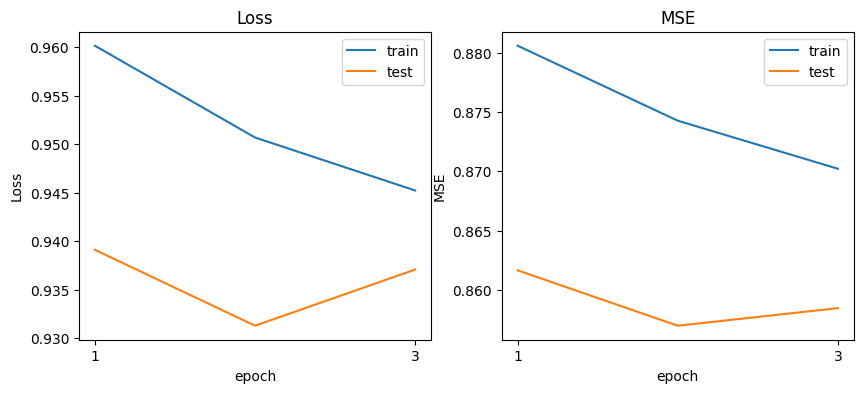

In [47]:
import json
from collections import namedtuple
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "TeX Gyre Heros"
history = namedtuple("history", ["history"])
with open("./ml-1m/keras_dfm_history.json", "r") as fid:
    history.history = json.load(fid)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
n_epochs = len(history.history["loss"])
epochs_arr = np.arange(1, n_epochs)
ax = axs[0]
ax.plot(epochs_arr, history.history["loss"][1:], label="train")
ax.plot(
    epochs_arr,
    history.history["val_mse"][1:],
    ls="--",
    label="test",
)
ax.legend()
# ax.set_yscale('log')
ax.set_xlabel("epoch")
ax.set_ylabel("Loss")
ax.set_title("Loss")
ax.set_xticks(epochs_arr[::2])
ax = axs[1]
ax.plot(epochs_arr, history.history["mse"][1:], label="train")
ax.plot(
    epochs_arr, history.history["val_mse"][1:], ls="--", label="test"
)
ax.legend()
# ax.set_yscale('log')
ax.set_xlabel("epoch")
ax.set_ylabel("MSE")
ax.set_title("MSE")
_ = ax.set_xticks(epochs_arr[::2])
plt.savefig("dfm-train.svg")

# Regular Expressions (Regex)

In [55]:
import re
# Example 1: remove punctuation
text = "How is it going? I'm good!"
result = re.sub(r'''[\.\?\!\,\:\;\"\']''', '', text)
result

'How is it going Im good'

In [56]:
# Example 2: tokenize: spaces and newline
text = """The quick    brown fox  jumps
over the lazy dog"""
result = re.split(r'\s+', text)
result

['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

In [57]:
import re
# Example 1: remove punctuation
text = "How is it going? I'm good!"
result = re.sub(r'''[\.\?\!\,\:\;\"\']''', '', text)
# 'How is it going Im good'

# Example 2: tokenize: spaces and newline
text = """The quick    brown fox  jumps
over the lazy dog"""
result = re.split(r'\s+', text)
# ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

# Example 3: find occurrences of the pattern
text = "The human genome has 3 billion base pairs, "
	"making the text file storing it as large as "
	"12 GB on disk."
result = re.findall(r'\d+', text)
# ['3', '12']

['3', '12']

# Data Serialization and Deserialization

In [58]:
import os
import tempfile
import tensorflow as tf
inputs = [
    {"student_id": "a-153248", "num_classes_taken": 5, "gpa": 3.97},
    {"student_id": "b-132429", "num_classes_taken": 3, "gpa": 3.51},
    {"student_id": "a-293841", "num_classes_taken": 4, "gpa": 4.00},
    {"student_id": "c-912431", "num_classes_taken": 4, "gpa": 3.91},
    {"student_id": "c-924145", "num_classes_taken": 3, "gpa": 3.20},
]
# Create the Features protobuf
examples = []
for x in inputs:
    # Create the dictionary
    feature = {
        "student_id": tf.train.Feature(
            bytes_list=tf.train.BytesList(value=[bytes(x["student_id"], "utf-8")])
        ),
        "num_classes_taken": tf.train.Feature(
            int64_list=tf.train.Int64List(value=[x["num_classes_taken"]])
        ),
        "gpa": tf.train.Feature(
            float_list=tf.train.FloatList(value=[x["gpa"]])
        )
    }

    # Create the Examples protobuf
    example = tf.train.Example(features=tf.train.Features(feature=feature))
    examples.append(example)

# print the last example
print(example)

features {
  feature {
    key: "student_id"
    value {
      bytes_list {
        value: "c-924145"
      }
    }
  }
  feature {
    key: "num_classes_taken"
    value {
      int64_list {
        value: 3
      }
    }
  }
  feature {
    key: "gpa"
    value {
      float_list {
        value: 3.2
      }
    }
  }
}



TFRecord

In [59]:
# Create a temporary TFRecord file
base_dir = tempfile.TemporaryDirectory()
file_path = os.path.join(base_dir.name, "temp.tfrecord")
options = tf.io.TFRecordOptions(compression_type="GZIP") # gzip compressed
with tf.io.TFRecordWriter(file_path, options=options) as writer:
    for example in examples:
        serialized_example = example.SerializeToString()
        writer.write(serialized_example)

# print last serialized example
print(serialized_example)

b'\nI\n\x1a\n\x11num_classes_taken\x12\x05\x1a\x03\n\x01\x03\n\x0f\n\x03gpa\x12\x08\x12\x06\n\x04\xcd\xccL@\n\x1a\n\nstudent_id\x12\x0c\n\n\n\x08c-924145'


In [60]:
dataset = tf.data.TFRecordDataset(
    tf.data.TFRecordDataset.list_files(file_path), # allows loading multiple files
    compression_type="GZIP", # make sure to decompress before decoding
)

# print a record
print(next(iter(dataset)))

tf.Tensor(b'\nI\n\x1a\n\x11num_classes_taken\x12\x05\x1a\x03\n\x01\x05\n\x0f\n\x03gpa\x12\x08\x12\x06\n\x04{\x14~@\n\x1a\n\nstudent_id\x12\x0c\n\n\n\x08a-153248', shape=(), dtype=string)


Parsing

In [80]:
# Define the feature schema
feature_spec = {
    "student_id": tf.io.FixedLenFeature((1, ), dtype=tf.string),
    "num_classes_taken": tf.io.FixedLenFeature((1, ), dtype=tf.int64),
    "gpa": tf.io.FixedLenFeature((1, ), dtype=tf.float32)
}

# Parsing a batch of data back
serialized_data = next(iter(dataset.batch(4)))
parsed_data = tf.io.parse_example(serialized_data, feature_spec)

In [81]:
print(parsed_data)

{'gpa': <tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[3.97],
       [3.51],
       [4.  ],
       [3.91]], dtype=float32)>, 'num_classes_taken': <tf.Tensor: shape=(4, 1), dtype=int64, numpy=
array([[5],
       [3],
       [4],
       [4]])>, 'student_id': <tf.Tensor: shape=(4, 1), dtype=string, numpy=
array([[b'a-153248'],
       [b'b-132429'],
       [b'a-293841'],
       [b'c-912431']], dtype=object)>}
